In [ ]:
import pandas as pd
import numpy as np
import math
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

In [ ]:
# house_and_non_trad.csv is our cleaned up data

datasetOriginal = pd.read_csv('house_and_non_trad.csv')
datasetOriginal = datasetOriginal.drop(columns=['Unnamed: 0'])

In [ ]:
# You can use this data to run any kind of model you want
datasetOriginal
dataset = datasetOriginal.drop(['SOLD DATE', 'SALE TYPE', 'DAYS ON MARKET', 'LOT SIZE','STATE OR PROVINCE','LOCATION','HOA/MONTH', 'PROPERTY TYPE','CITY', 'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED',
'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)'], axis=1,)
dataset= dataset.dropna()
dataset

,ADDRESS,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,YEAR BUILT,$/SQUARE FEET,LATITUDE,LONGITUDE,ClosestHospital,ClosestGrocery,ClosestParks,ClosestWhole
43,2206 Cambridge St,21231,500000,0.0,1.0,4872.0,1920.0,103.0,39.284084,-76.585067,1.279355,1.187137,0.744020,1.187137
45,3805 Greenmount Ave,21218,135000,0.0,1.0,2320.0,1920.0,58.0,39.336015,-76.609105,0.843154,0.310962,0.265864,0.310962
55,2906 Berwick Ave,21234,125000,0.0,2.0,1204.0,1931.0,104.0,39.365432,-76.553587,2.999255,3.246027,5.571253,5.516701
57,2827 Guilford Ave,21218,390000,0.0,1.5,2016.0,1914.0,193.0,39.323159,-76.612896,0.726585,0.534563,0.356240,0.952098
90,506 S Broadway,21231,410000,0.0,2.0,4558.0,1920.0,90.0,39.285310,-76.593756,0.877138,0.527684,1.032709,0.527684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,6704 Pebble Brooke Rd,21209,727500,5.0,4.5,4587.0,2012.0,159.0,39.377639,-76.670441,2.165290,2.046464,3.806095,5.721520
4916,3412 Hamilton Ave,21214,300000,5.0,3.0,2400.0,2020.0,125.0,39.347683,-76.556296,2.887919,1.573646,4.171326,4.516964
4917,6715 Evanston Rd,21209,770000,5.0,3.5,4830.0,2013.0,159.0,39.379654,-76.667238,2.178343,1.948938,3.742211,5.503771
4918,120-A Midhurst Rd,21212,1050000,5.0,5.5,4198.0,2017.0,250.0,39.373612,-76.619184,2.072651,0.625980,2.351969,3.155345


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
dataset = dataset.drop(['ZIP OR POSTAL CODE', '$/SQUARE FEET', 'LATITUDE', 'LONGITUDE'], axis=1,)

In [ ]:
dataset

,ADDRESS,PRICE,BEDS,BATHS,SQUARE FEET,YEAR BUILT,ClosestHospital,ClosestGrocery,ClosestParks,ClosestWhole
43,2206 Cambridge St,500000,0.0,1.0,4872.0,1920.0,1.279355,1.187137,0.744020,1.187137
45,3805 Greenmount Ave,135000,0.0,1.0,2320.0,1920.0,0.843154,0.310962,0.265864,0.310962
55,2906 Berwick Ave,125000,0.0,2.0,1204.0,1931.0,2.999255,3.246027,5.571253,5.516701
57,2827 Guilford Ave,390000,0.0,1.5,2016.0,1914.0,0.726585,0.534563,0.356240,0.952098
90,506 S Broadway,410000,0.0,2.0,4558.0,1920.0,0.877138,0.527684,1.032709,0.527684
...,...,...,...,...,...,...,...,...,...,...
4915,6704 Pebble Brooke Rd,727500,5.0,4.5,4587.0,2012.0,2.165290,2.046464,3.806095,5.721520
4916,3412 Hamilton Ave,300000,5.0,3.0,2400.0,2020.0,2.887919,1.573646,4.171326,4.516964
4917,6715 Evanston Rd,770000,5.0,3.5,4830.0,2013.0,2.178343,1.948938,3.742211,5.503771
4918,120-A Midhurst Rd,1050000,5.0,5.5,4198.0,2017.0,2.072651,0.625980,2.351969,3.155345


In [ ]:
Y = dataset["PRICE"].values
X = dataset.drop(["PRICE","ADDRESS"], axis=1,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 1/3)

In [ ]:
from sklearn.metrics import accuracy_score
rf_arru_lst_test = [] # List for storing training accuracies.
rf_arru_lst_train = [] # List for storing test accuracies.
n_estimators_lst = np.arange(1,305,50)
# Instantiate tree classifier
for i in n_estimators_lst:
  print(i)
  rf = RandomForestRegressor(n_estimators =  i, min_samples_split= 4, max_depth=35, max_features= 'log2', min_samples_leaf=4, bootstrap= True)
  # Train fit
  rf.fit(X_train, np.ravel(y_train))
  # Train accuracy
  train_acc = metrics.r2_score(y_train, rf.predict(X_train))
  # Append to dtaccuracy_train
  rf_arru_lst_train.append(train_acc)
  # Test accuracy
  test_acc = metrics.r2_score(y_test, rf.predict(X_test))
  # Append to dtaccuracy_test
  rf_arru_lst_test.append(test_acc)

1
51
101
151
201
251
301


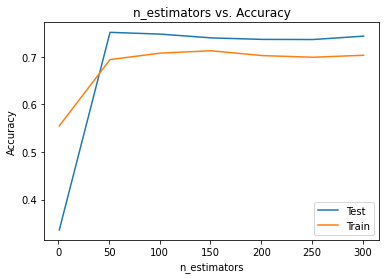

In [ ]:
plt.plot(n_estimators_lst, rf_arru_lst_test, label = "Test")
plt.plot(n_estimators_lst, rf_arru_lst_train, label = "Train")
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('n_estimators vs. Accuracy')
plt.legend()
plt.show()

In [ ]:
rf = RandomForestRegressor(n_estimators =  200, min_samples_split= 4, max_depth=35, max_features= 'log2', min_samples_leaf=4, bootstrap= True)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=35, max_features='log2', min_samples_leaf=4,
                      min_samples_split=4, n_estimators=200)

In [ ]:
prediction = rf.predict(X_test)
prediction1 = rf.predict(X_train)
rsquare_test = metrics.r2_score(y_test, prediction)
rsquare_train = metrics.r2_score(y_train, prediction1)
print(rsquare_test)
print(rsquare_train)

0.7363600162765511
0.7023398722215068


In [ ]:
def get_accuracymoney(margin, actualList, predList):
  length = len(actualList)
  correct = 0
  for i in range(length):
    if abs((actualList[i] - predList[i])/ actualList[i]) <= margin:
      correct += 1
  return (correct / length * 100)

print(get_accuracymoney(0.15, y_test, prediction))
print(get_accuracymoney(0.15, y_train, prediction1))

52.69804822043628
64.75315729047072


In [ ]:
importances = list(rf.feature_importances_)
print(importances)
print(list(X_train.columns))
feature_list = list(X_train.columns)
feature_importances = [(feature, round(importance, 10)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[0.02909695757635428, 0.1506685653685276, 0.4549370158432913, 0.09567573910725423, 0.036118635297458936, 0.06711301732158065, 0.04003005871681045, 0.12636001076872266]
['BEDS', 'BATHS', 'SQUARE FEET', 'YEAR BUILT', 'ClosestHospital', 'ClosestGrocery', 'ClosestParks', 'ClosestWhole']
Variable: SQUARE FEET          Importance: 0.4549370158
Variable: BATHS                Importance: 0.1506685654
Variable: ClosestWhole         Importance: 0.1263600108
Variable: YEAR BUILT           Importance: 0.0956757391
Variable: ClosestGrocery       Importance: 0.0671130173
Variable: ClosestParks         Importance: 0.0400300587
Variable: ClosestHospital      Importance: 0.0361186353
Variable: BEDS                 Importance: 0.0290969576


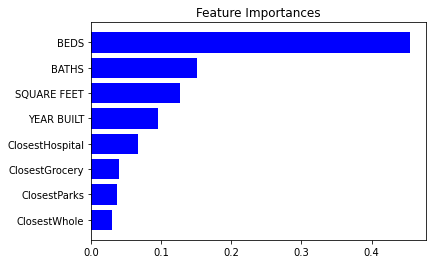

In [ ]:
# Random forest generate feature importance
importances =rf.feature_importances_
indices = np.argsort(importances)
feature_list.reverse()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(feature_list)),feature_list)
plt.show()